In [19]:
import pandas as pd
import datetime
from fbprophet import Prophet
# Upgrade pyplot 
#pip install --upgrade plotly
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In the next line we are going to choose the number of days we want to predict. For this project we have chosen 7 days, but it can be changed for investigating:

In [20]:
days = 28

In [21]:
df = pd.read_csv('./final_dataframe.csv',index_col='datetime')


In [22]:
new_df = df.reset_index()[['datetime','Termino_de_facturacion_de_energia_activa_del_PVPC_eficiencia_2_periodos_(DHA)']]
new_df.columns= ['ds','y']

In [23]:
new_df.ds = pd.to_datetime(new_df.ds)
new_df.ds = new_df.ds.dt.strftime("%Y-%m-%d %H:%M:%S")

In [24]:
val = 24*days
train = new_df.shift(-val).dropna(axis=0,how='any')
test = new_df.loc[~new_df.index.isin(train.index)]

In [25]:
m = Prophet()
m.fit(train)

In [26]:
forecast = m.predict(test[['ds']])
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
667,2020-08-08 17:00:00,106.644392,90.755969,123.900504
668,2020-08-08 18:00:00,115.977377,97.494659,132.647667
669,2020-08-08 19:00:00,108.992692,90.204963,125.988878
670,2020-08-08 20:00:00,84.101304,67.234916,100.799819
671,2020-08-08 21:00:00,52.965779,36.514840,70.608344


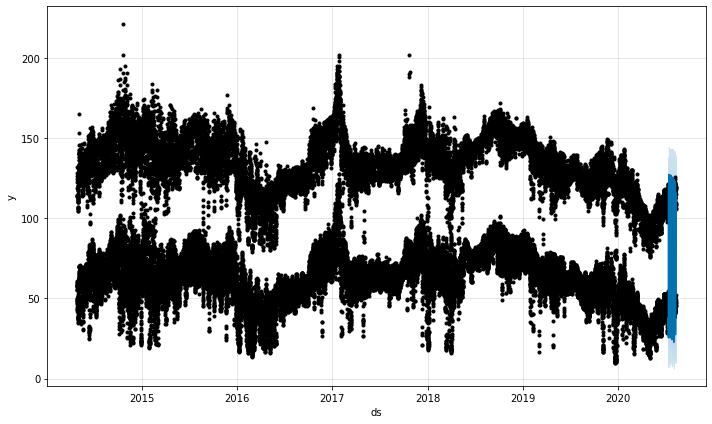

In [27]:
fig1 = m.plot(forecast)


```python
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

fig = plot_plotly(m, forecast)  # This returns a plotly Figure
py.iplot(fig)
```


In [28]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-07-11 22:00:00,65.173865,17.729040,51.143623,65.173865,65.173865,-30.624718,-30.624718,-30.624718,-28.699945,...,-5.596669,-5.596669,-5.596669,3.671896,3.671896,3.671896,0.0,0.0,0.0,34.549147
1,2020-07-11 23:00:00,65.171190,10.505199,43.989872,65.171190,65.171190,-38.316862,-38.316862,-38.316862,-36.215753,...,-5.778321,-5.778321,-5.778321,3.677212,3.677212,3.677212,0.0,0.0,0.0,26.854328
2,2020-07-12 00:00:00,65.168516,13.177385,45.965894,65.168516,65.168516,-36.578667,-36.578667,-36.578667,-34.324891,...,-5.936277,-5.936277,-5.936277,3.682500,3.682500,3.682500,0.0,0.0,0.0,28.589849
3,2020-07-12 01:00:00,65.165842,13.153329,47.274796,65.165842,65.165842,-34.868300,-34.868300,-34.868300,-32.486940,...,-6.069119,-6.069119,-6.069119,3.687760,3.687760,3.687760,0.0,0.0,0.0,30.297542
4,2020-07-12 02:00:00,65.163168,10.862084,43.411169,65.163168,65.163168,-37.145740,-37.145740,-37.145740,-34.663113,...,-6.175619,-6.175619,-6.175619,3.692991,3.692991,3.692991,0.0,0.0,0.0,28.017428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,2020-08-08 17:00:00,63.390168,90.755969,123.900504,63.390168,63.390168,43.254224,43.254224,43.254224,46.263730,...,-4.393349,-4.393349,-4.393349,1.383843,1.383843,1.383843,0.0,0.0,0.0,106.644392
668,2020-08-08 18:00:00,63.387494,97.494659,132.647667,63.387494,63.387494,52.589884,52.589884,52.589884,55.877024,...,-4.666953,-4.666953,-4.666953,1.379813,1.379813,1.379813,0.0,0.0,0.0,115.977377
669,2020-08-08 19:00:00,63.384819,90.204963,125.988878,63.384819,63.384819,45.607873,45.607873,45.607873,49.158186,...,-4.926118,-4.926118,-4.926118,1.375804,1.375804,1.375804,0.0,0.0,0.0,108.992692
670,2020-08-08 20:00:00,63.382145,67.234916,100.799819,63.382145,63.382145,20.719159,20.719159,20.719159,24.516107,...,-5.168763,-5.168763,-5.168763,1.371815,1.371815,1.371815,0.0,0.0,0.0,84.101304


Test RMSE: 12.057 and Test R2: 0.877


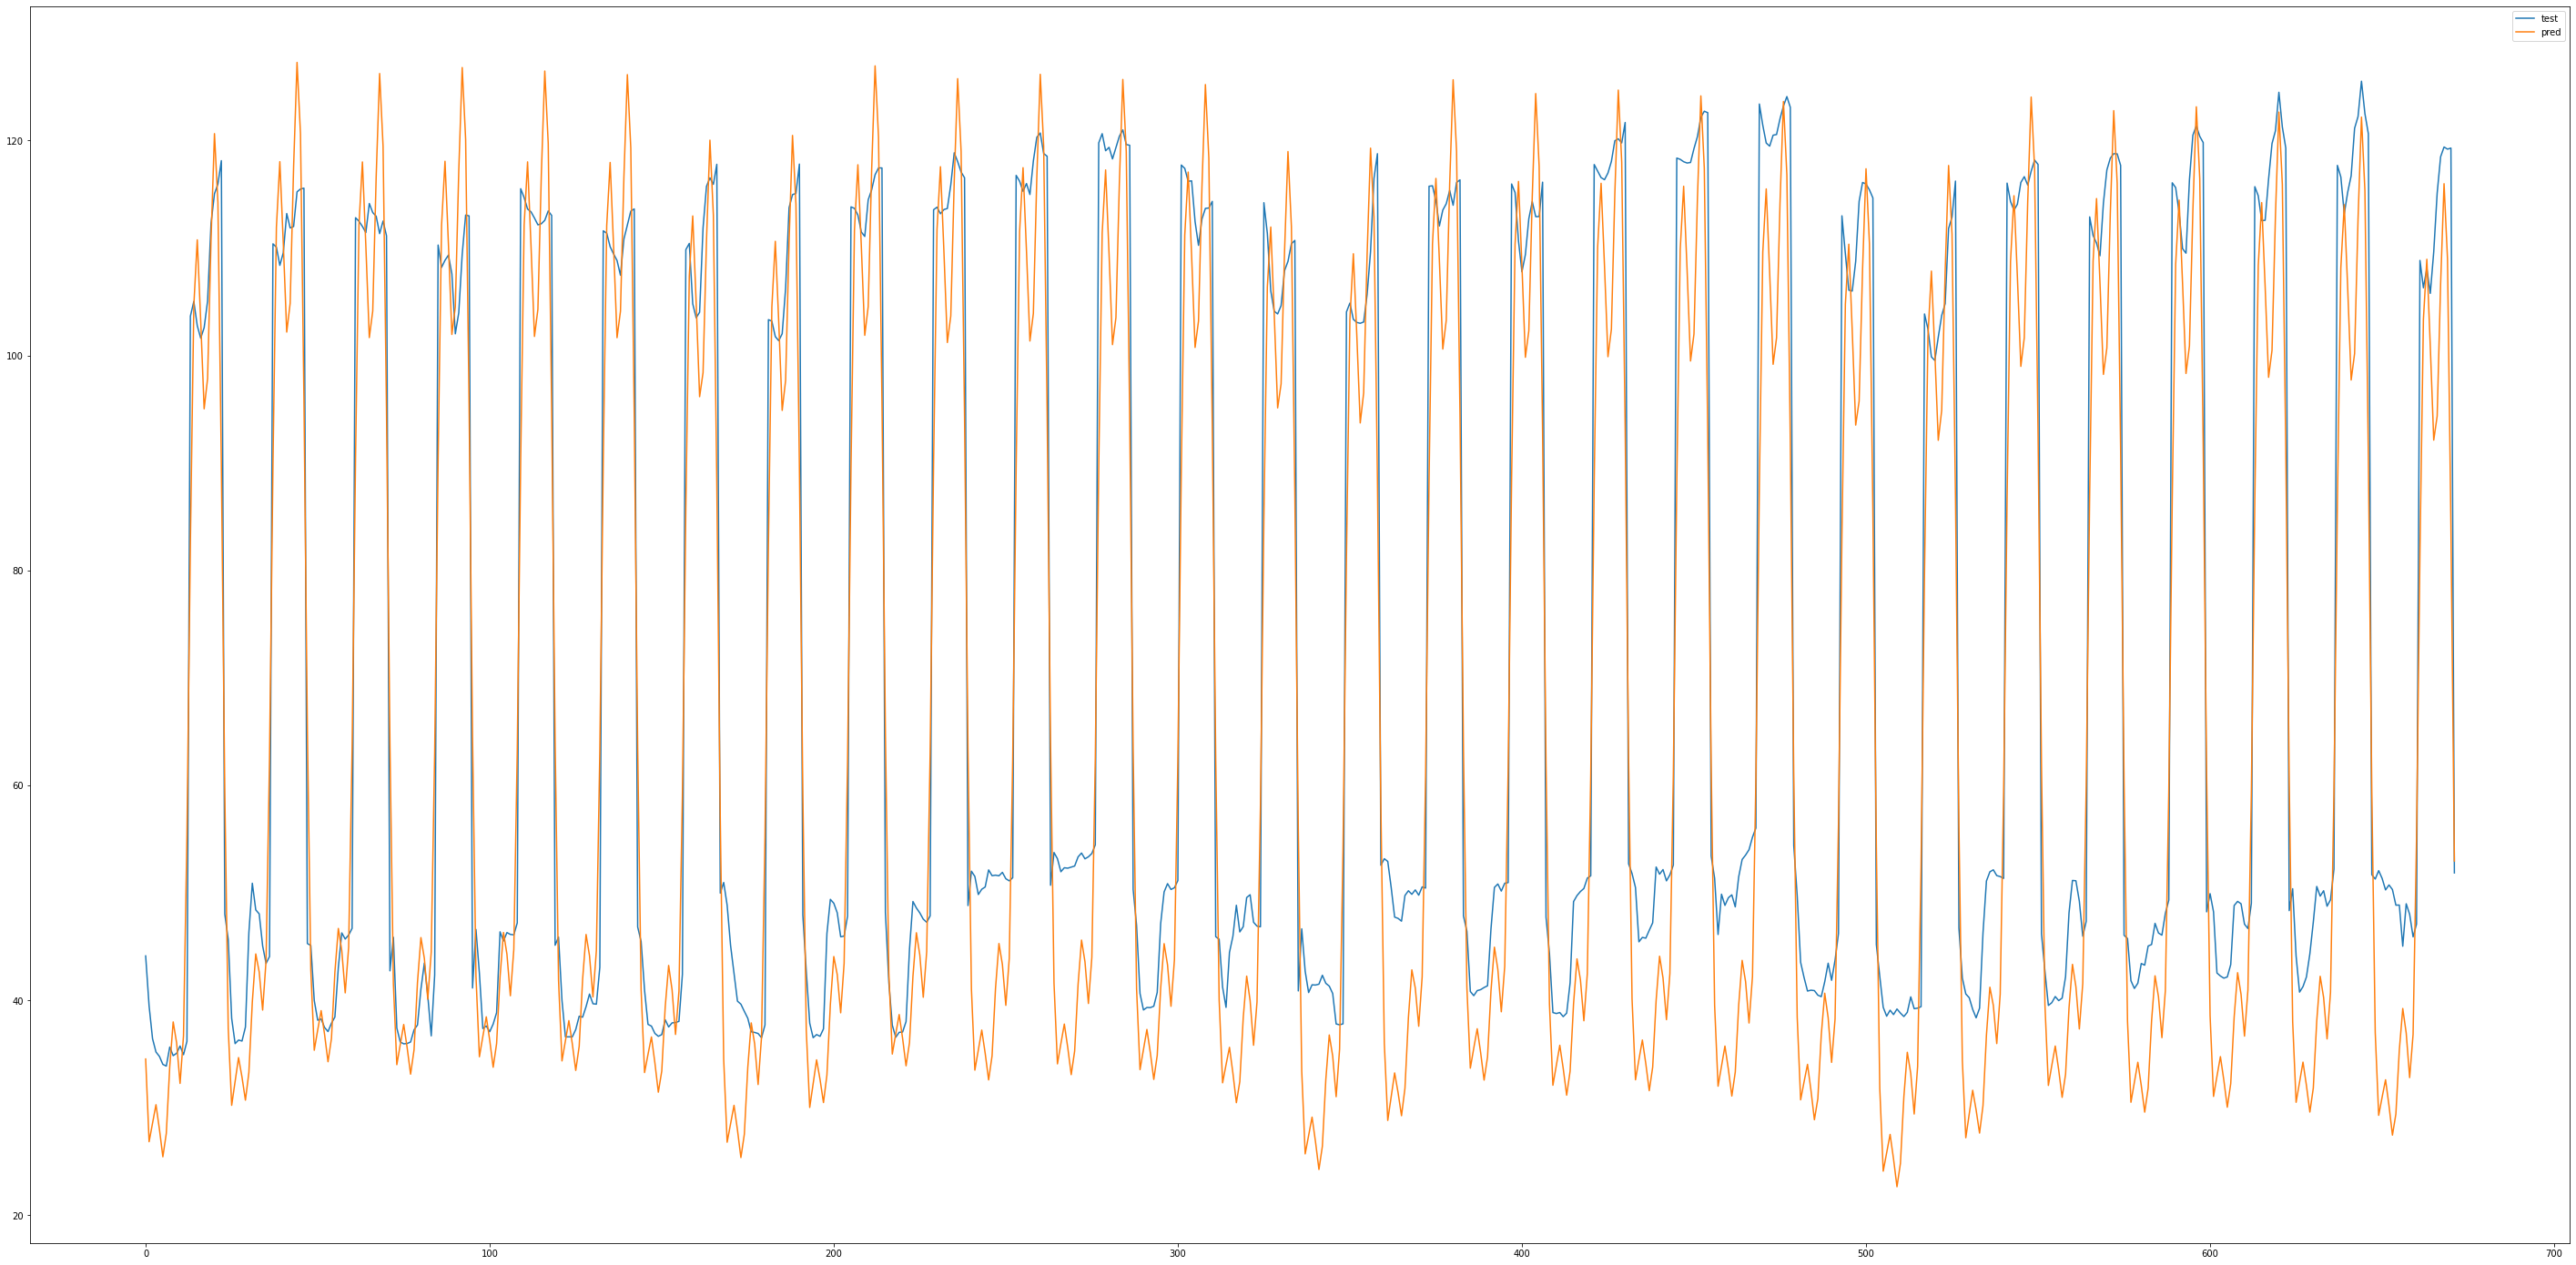

In [29]:
rmse = np.sqrt(mean_squared_error(test['y'], forecast['yhat']))
r2 = r2_score(test['y'], forecast['yhat'])
print('Test RMSE: %.3f' % rmse + ' and Test R2: %.3f' % r2)
plt.rcParams['figure.figsize'] = [50, 25]
plt.plot(test['y'].reset_index().drop('index',axis=1), label='test')
plt.plot(forecast['yhat'], label='pred')
plt.legend()
plt.show()

In [30]:
pd.DataFrame({'y_test':test['y'].values, 'y_pred':forecast['yhat'].values},index = test.index).to_csv('./../Visualization/Faceboo_prophet.csv')

# Si utilizamos un modelo SARIMAX:

In [31]:
df = pd.read_csv('./final_dataframe.csv',index_col='datetime')


In [32]:
new_df = df.reset_index()[['datetime','Termino_de_facturacion_de_energia_activa_del_PVPC_eficiencia_2_periodos_(DHA)']]
new_df.columns= ['ds','y']

In [33]:
new_df.ds = pd.to_datetime(new_df.ds)
new_df.ds = new_df.ds.dt.strftime("%Y-%m-%d %H:%M:%S")
new_df = new_df.set_index('ds')

In [34]:
val = 24*days
train = new_df.shift(-val).dropna(axis=0,how='any')
test = new_df.loc[~new_df.index.isin(train.index)]

In [35]:
inicio = '2016-01-01 00:00:00'
train = train.loc['2016-01-01 00:00:00':]

import pmdarima as pm
model = pm.auto_arima(
    train,
    stationary = False,
    m=12,
    n_jobs = -1,
    exogenous = df.iloc[15360:df.shape[0]-val,list(df.columns).index('holidays')].values.reshape(df.shape[0]-15360-val,1),
    suppress_warnings=True
)

model.summary()

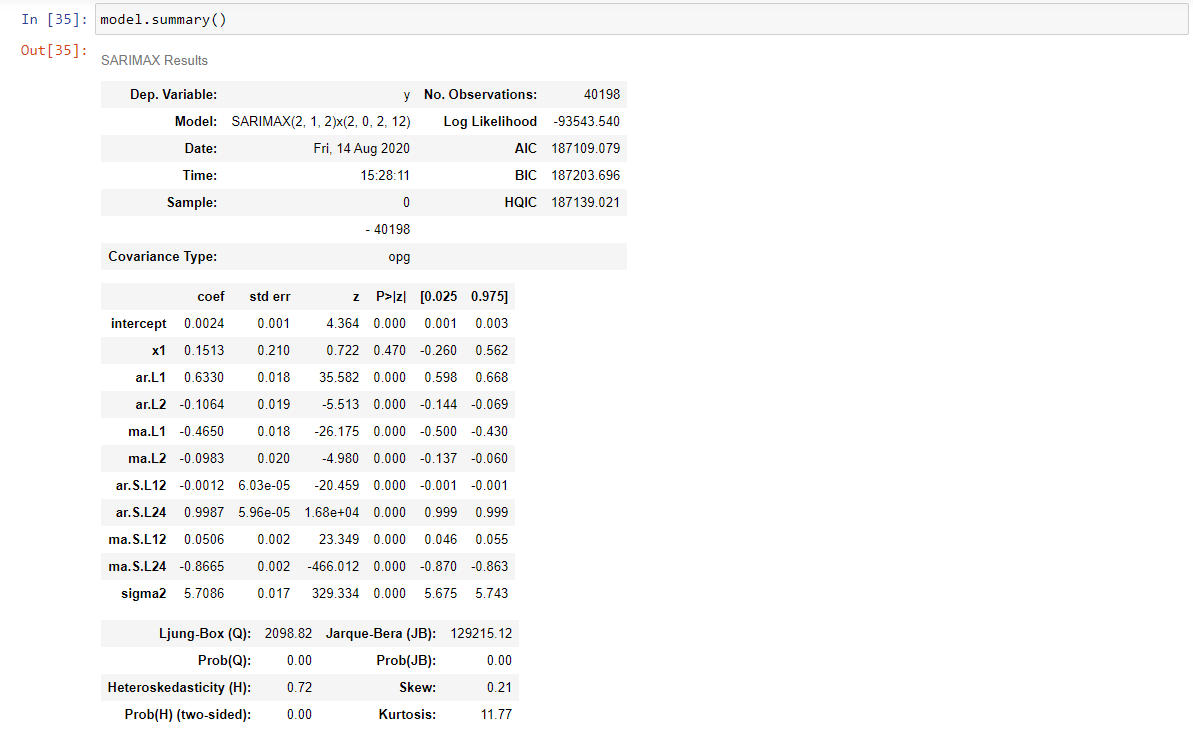

forecast_mean, conf_int = model.predict(val, return_conf_int = False)

y_test = test[:val]['y']
fig, ax = plt.subplots()
y_test.plot(ax=ax)
pd.Series(model.predict(val, return_conf_int = False), index=y_test.index).plot(ax=ax)

val = 24*days
rmse = np.sqrt(mean_squared_error(test[:val]['y'], model.predict(val, return_conf_int = False)))
r2 = r2_score(test[:val]['y'],  model.predict(val, return_conf_int = False))
print('Test RMSE: %.3f' % rmse + ' and Test R2: %.3f' % r2)

pd.DataFrame({'y_test':test[:val]['y'], 'y_pred': model.predict(val, return_conf_int = False)},index = test.index).to_csv('./../Visualization/SARIMAX.csv')

In [36]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model2 = SARIMAX(train, order = (2, 1, 2), seasonal_order = (2, 0, 2, 12)).fit()

/home/joeldela/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/home/joeldela/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/home/joeldela/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [37]:
forecast_mean2 = model2.forecast(val, return_conf_int = True)

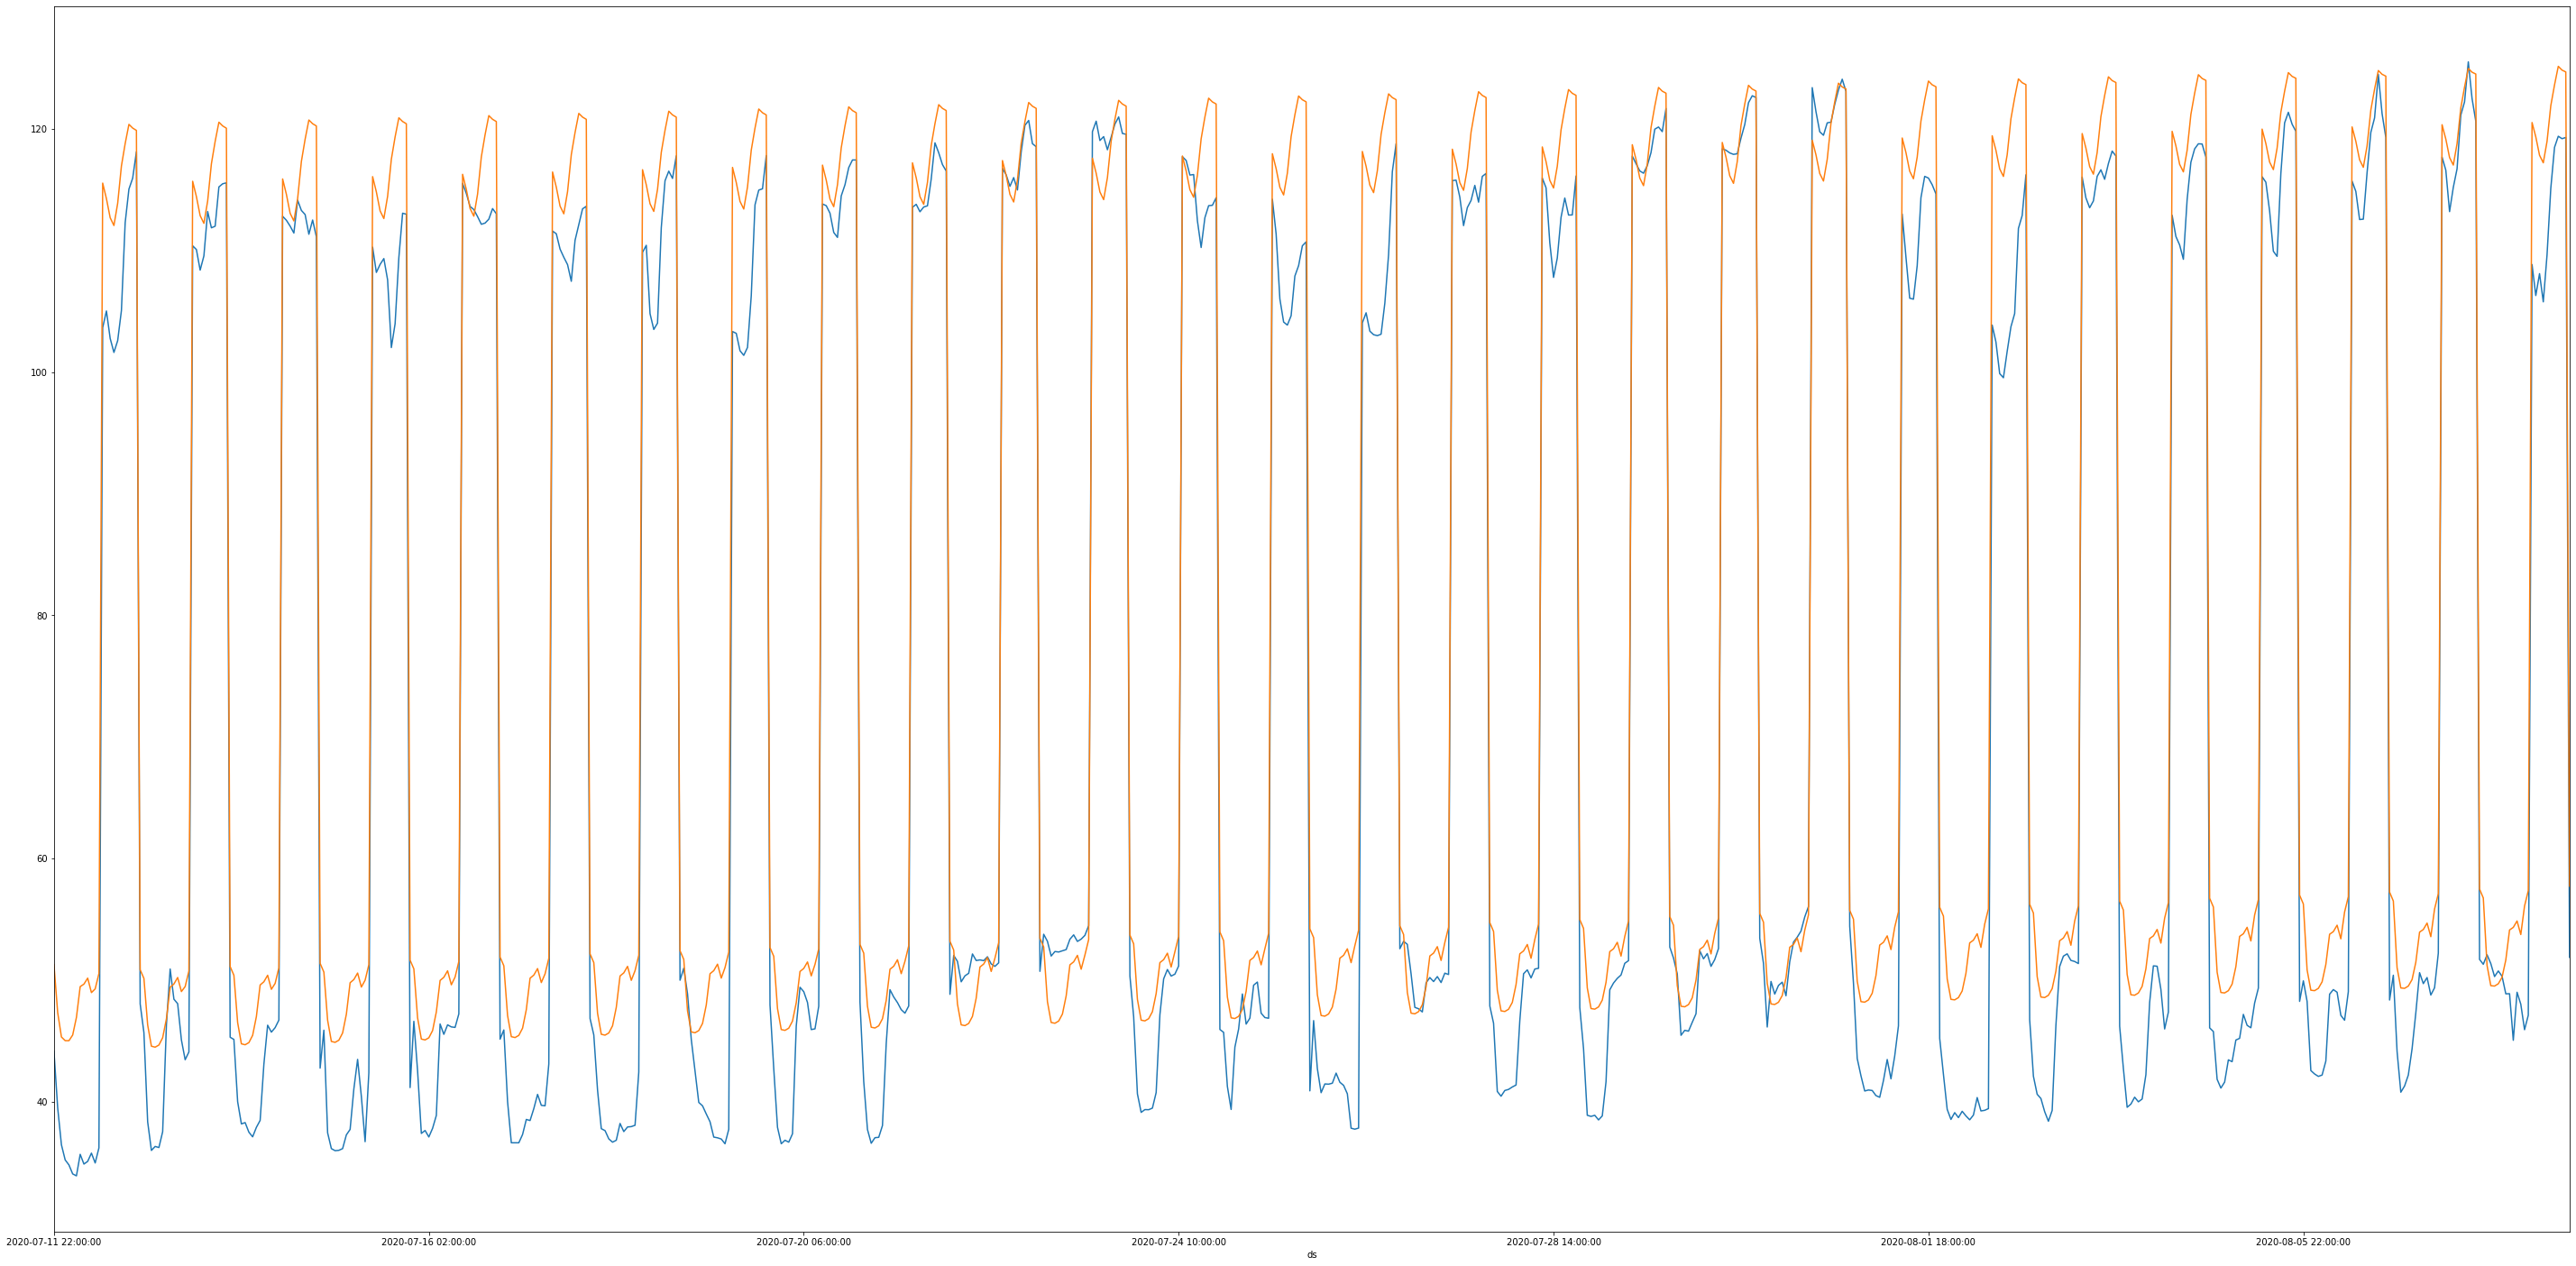

In [38]:
y_test = test[:val]['y']
fig, ax = plt.subplots()
y_test.plot(ax=ax)
pd.Series(model2.forecast(val, return_conf_int = False), index=y_test.index).plot(ax=ax)

In [39]:
val = 24*days
rmse = np.sqrt(mean_squared_error(test[:val]['y'], model2.forecast(val, return_conf_int = False)))
r2 = r2_score(test[:val]['y'],  model2.forecast(val, return_conf_int = False))
print('Test RMSE: %.3f' % rmse + ' and Test R2: %.3f' % r2)

Test RMSE: 7.244 and Test R2: 0.956


In [40]:
pd.DataFrame({'y_test':test[:val]['y'].values, 'y_pred': model2.forecast(val, return_conf_int = False).values},index = test[:val].index).to_csv('./../Visualization/SARIMAX_2.csv')